In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

# Lectura Temperatura

In [3]:
Tmax = pd.read_csv("/content/M5180-Atacazo_Temperatura_del_aire_Dato_validado.csv")
Tmax = Tmax[['fecha','maximo']]
Tmax = Tmax.rename(columns={'maximo':'Tmax'})

# Convertir la columna "fecha" a formato de fecha y hora
Tmax['fecha'] = pd.to_datetime(Tmax['fecha'], format='%Y-%m-%d %H:%M:%S')
Tmax = Tmax.set_index('fecha')
date_range = pd.date_range(start=Tmax.index.min(), end=Tmax.index.max(), freq='D')

# Reindex the dataframe with the date range
Tmax = Tmax.reindex(date_range)

# Lectura Humeda Relativa

In [4]:
RHmin = pd.read_csv("/content/M5180-Atacazo_Humedad_del_aire_Dato_validado.csv")
RHmin = RHmin[['fecha','minimo']]
RHmin = RHmin.rename(columns={'minimo':'RHmin'})

# Convertir la columna "fecha" a formato de fecha y hora
RHmin['fecha'] = pd.to_datetime(RHmin['fecha'], format='%Y-%m-%d %H:%M:%S')
RHmin = RHmin.set_index('fecha')
date_range = pd.date_range(start=RHmin.index.min(), end=RHmin.index.max(), freq='D')

# Reindex the dataframe with the date range
RHmin = RHmin.reindex(date_range)

# Crear dataframe

In [5]:
FM = pd.concat([Tmax,RHmin], axis=1)
FM

,Tmax,RHmin
2020-01-01,5.724,100.0
2020-01-02,5.462,100.0
2020-01-03,5.805,100.0
2020-01-04,5.038,100.0
2020-01-05,NaN,NaN
...,...,...
2024-07-28,3.928,NaN
2024-07-29,4.473,NaN
2024-07-30,4.169,NaN
2024-07-31,3.258,NaN


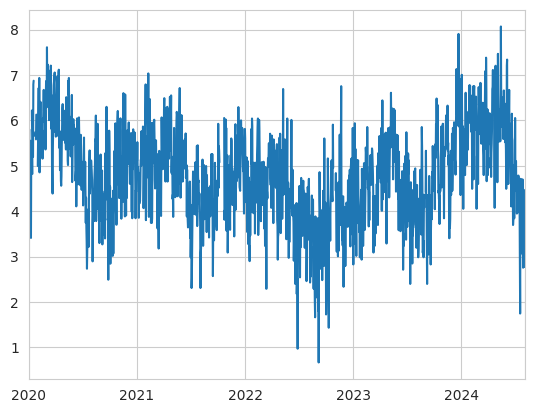

In [6]:
FM["Tmax"].plot()
plt.show()

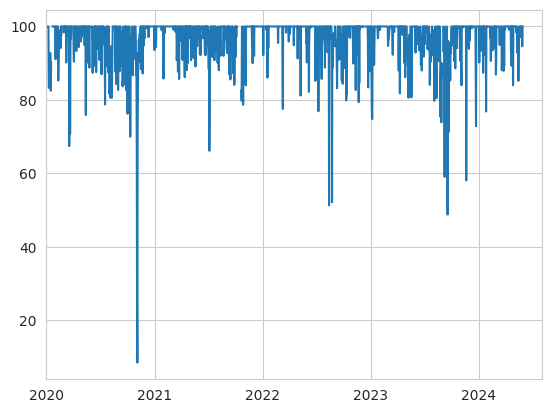

In [7]:
FM["RHmin"].plot()
plt.show()

# Calcular FM

In [8]:
FM["es"] = 0.6108  * np.exp(17.27*(FM["Tmax"]/(FM["Tmax"]+237.3)))
FM["ea"] = (FM["RHmin"]/100) * FM["es"]
FM["D"] = FM["es"] -FM["ea"]
FM["resultado"] = 6.79 + 27.43*np.exp(-1.05*FM["D"])
FM

,Tmax,RHmin,es,ea,D,resultado
2020-01-01,5.724,100.0,0.917391,0.917391,0.0,34.22
2020-01-02,5.462,100.0,0.900846,0.900846,0.0,34.22
2020-01-03,5.805,100.0,0.922560,0.922560,0.0,34.22
2020-01-04,5.038,100.0,0.874628,0.874628,0.0,34.22
2020-01-05,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
2024-07-28,3.928,NaN,0.809149,NaN,NaN,NaN
2024-07-29,4.473,NaN,0.840737,NaN,NaN,NaN
2024-07-30,4.169,NaN,0.822986,NaN,NaN,NaN
2024-07-31,3.258,NaN,0.771754,NaN,NaN,NaN


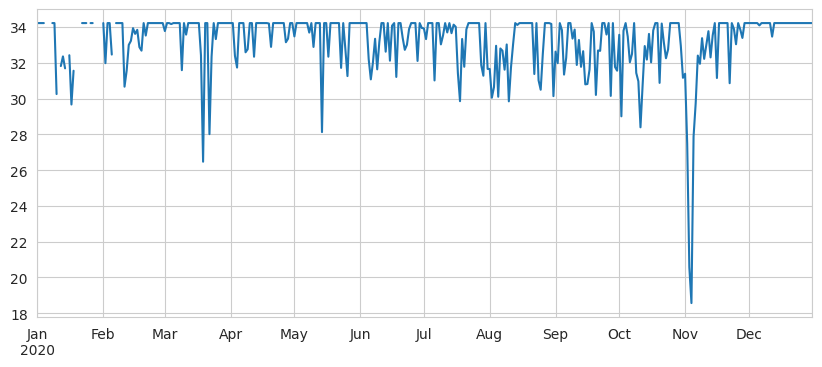

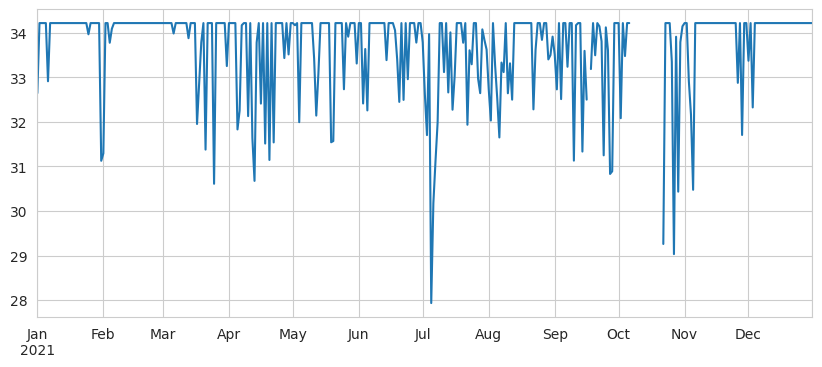

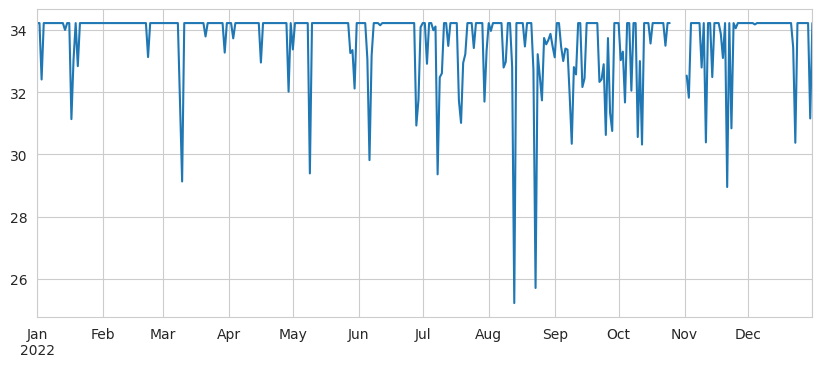

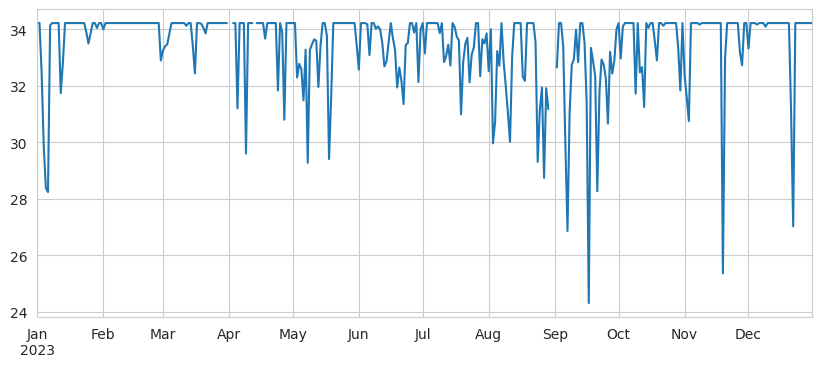

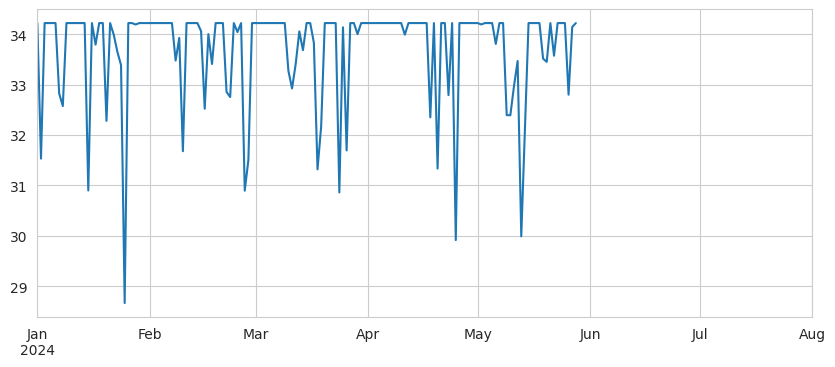

In [12]:
for year in set(FM.index.year):
  plt.figure(figsize=(10, 4))
  FM['resultado'].loc[(FM.index.year ==year)].plot()
  plt.show()